# Assignment 3

# 1- Using Make_blob generate data of 1000 data points with three cluster apply kmeans on it with k = 3 and use the metrics and get the accuracy (For Accuracy take reference of DBSCAN evaluation)
## Apply DBscan on Cust Segmentation Data

In [1]:
# Generating 1000 datapoints with 3 cluster Test DataSets using sklearn.datasets.make_blobs

from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

X, y = make_blobs(n_samples = 1000, centers = 3,
                  cluster_std = 1, n_features = 2)


In [2]:
X.shape

(1000, 2)

In [3]:
y.shape

(1000,)

In [4]:
# importing KMean algorithm from sklearn

from sklearn.cluster import KMeans
clust = KMeans(n_clusters = 3) 

In [5]:
# fitting model 
clust.fit(X)

KMeans(n_clusters=3)

In [6]:
# check cluster labels
set(clust.labels_)

{0, 1, 2}

Text(0, 0.5, 'Y-Axis')

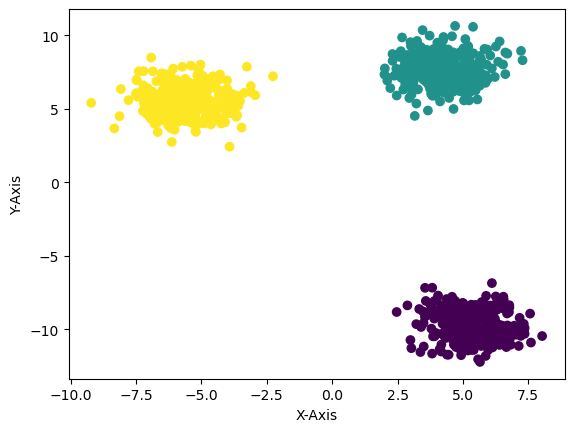

In [7]:
# plotting data
plt.scatter(X[:, 0], X[:, 1], c = clust.labels_)
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")

In [8]:
# finding silhouette score ( finding goodness of clustering )

from sklearn.metrics import silhouette_score
score = silhouette_score (X, clust.predict(X), metric='euclidean')

print (f"For n_clusters = {3}, silhouette score of KMeans is {score*100:.2f}%")

For n_clusters = 3, silhouette score of KMeans is 84.74%


## DBscan on Cust Segmentation Data

In [9]:
# importing necessary libraries

import pandas as pd
import numpy as np

In [10]:
# Loading cust segmentation data and having a quick look on dataset

cust_df = pd.read_csv("C:\\Users\\ADMIN\\Downloads\\Datasets\\Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [11]:
cust_df.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'Address', 'DebtIncomeRatio'],
      dtype='object')

In [12]:
x = cust_df[['Age', 'Edu', 'Years Employed', 'Income', 
              'Card Debt','Other Debt', 'DebtIncomeRatio']]

In [13]:
x.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,6.3
1,47,1,26,100,4.582,8.218,12.8
2,33,2,10,57,6.111,5.802,20.9
3,29,2,4,19,0.681,0.516,6.3
4,47,1,31,253,9.308,8.908,7.2


In [14]:
# Scaling data

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [15]:
# transforming into scaled data
data = ss.fit_transform(x)

In [16]:
# importing dbscan from sklearn & fitting the model on data

from sklearn.cluster import DBSCAN
clust = DBSCAN(eps = 5, min_samples = 20).fit(data)

In [17]:
# now let's check the cluster labels

set(clust.labels_)

{-1, 0}

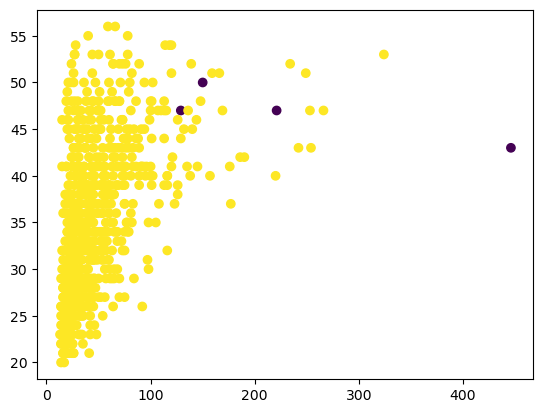

In [18]:
# plotting the cluster graph

plt.scatter(x.Income, x.Age, c = clust.labels_)

In [19]:
print(f"For radius={5} , silhouette_Score of dbscan model is : {silhouette_score (x,clust.labels_)*100:.2f}%")

For radius=5 , silhouette_Score of dbscan model is : 78.26%


# Q2-Using dirtydata.csv Demonstrate all the techniques for removing the null values
● Replace by MEAN
● Replace by MEDIAN
● Replace by MODE
● Replace by ARBITUARY VALUE
● Replace by 0

In [20]:
# Loading dirty data

dirty_data = pd.read_csv("C:\\Users\\ADMIN\\Downloads\\Datasets\\dirtydata.csv")

In [21]:
# Quick look on data
dirty_data

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0
5,60,'2020/12/06',102,127,300.0
6,60,'2020/12/07',110,136,374.0
7,450,'2020/12/08',104,134,253.3
8,30,'2020/12/09',109,133,195.1
9,60,'2020/12/10',98,124,269.0


In [22]:
# Info about data
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  30 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


In [23]:
# Checking null values
dirty_data.isnull().sum()

Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    2
dtype: int64

### There are some null values in the dataset. There is one missing value in "Date" column & two missing values in "Calories" column.


In [24]:
dirty_data["Date"]

0     '2020/12/01'
1     '2020/12/02'
2     '2020/12/03'
3     '2020/12/04'
4     '2020/12/05'
5     '2020/12/06'
6     '2020/12/07'
7     '2020/12/08'
8     '2020/12/09'
9     '2020/12/10'
10    '2020/12/11'
11    '2020/12/12'
12    '2020/12/12'
13    '2020/12/13'
14    '2020/12/14'
15    '2020/12/15'
16    '2020/12/16'
17    '2020/12/17'
18    '2020/12/18'
19    '2020/12/19'
20    '2020/12/20'
21    '2020/12/21'
22             NaN
23    '2020/12/23'
24    '2020/12/24'
25    '2020/12/25'
26        20201226
27    '2020/12/27'
28    '2020/12/28'
29    '2020/12/29'
30    '2020/12/30'
31    '2020/12/31'
Name: Date, dtype: object

### In Date column we found null value at 22nd row and at 26th row data filled improperly. so have to handle both value.

# Replace by Arbitary value

### Replacing the null value of Date column with arbitary value

In [25]:
df_date = dirty_data.copy()

In [26]:
df_date["Date"]=df_date["Date"].fillna("2020/12/22")  # filling null value with arbitary value i.e. 2020/12/22
df_date["Date"][26]= "2020/12/26" # filling Date with proper format


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8324\2117755810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date["Date"][26]= "2020/12/26" # filling Date with proper format


In [27]:
df_date["Date"]

0     '2020/12/01'
1     '2020/12/02'
2     '2020/12/03'
3     '2020/12/04'
4     '2020/12/05'
5     '2020/12/06'
6     '2020/12/07'
7     '2020/12/08'
8     '2020/12/09'
9     '2020/12/10'
10    '2020/12/11'
11    '2020/12/12'
12    '2020/12/12'
13    '2020/12/13'
14    '2020/12/14'
15    '2020/12/15'
16    '2020/12/16'
17    '2020/12/17'
18    '2020/12/18'
19    '2020/12/19'
20    '2020/12/20'
21    '2020/12/21'
22      2020/12/22
23    '2020/12/23'
24    '2020/12/24'
25    '2020/12/25'
26      2020/12/26
27    '2020/12/27'
28    '2020/12/28'
29    '2020/12/29'
30    '2020/12/30'
31    '2020/12/31'
Name: Date, dtype: object

# Replace by Mean

In [28]:
cal_mean  = dirty_data.copy()
cal_mean["Calories"].mean() 

304.68

In [29]:
cal_mean["Calories"] = cal_mean["Calories"].fillna(cal_mean["Calories"].mean())
cal_mean  # filled calory's null value (present at 18 & 28th row) with mean 304.68

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.10
1,60,'2020/12/02',117,145,479.00
2,60,'2020/12/03',103,135,340.00
3,45,'2020/12/04',109,175,282.40
4,45,'2020/12/05',117,148,406.00
5,60,'2020/12/06',102,127,300.00
6,60,'2020/12/07',110,136,374.00
7,450,'2020/12/08',104,134,253.30
8,30,'2020/12/09',109,133,195.10
9,60,'2020/12/10',98,124,269.00


# Replace by Median

In [30]:
cal_median = dirty_data.copy()

In [31]:
cal_median["Calories"].median()

291.2

In [32]:
cal_median["Calories"] = cal_median["Calories"].fillna(cal_median["Calories"].median())
cal_median # filled null values with median value 291.2

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0
5,60,'2020/12/06',102,127,300.0
6,60,'2020/12/07',110,136,374.0
7,450,'2020/12/08',104,134,253.3
8,30,'2020/12/09',109,133,195.1
9,60,'2020/12/10',98,124,269.0


# Replace by Mode

In [33]:
cal_mode = dirty_data.copy()

In [34]:
cal_mode["Calories"].mode() 

0    300.0
Name: Calories, dtype: float64

In [35]:
cal_mode["Calories"] = cal_mode["Calories"].fillna(cal_mode["Calories"].mode()[0])
cal_mode # null values filled with mode value i.e 300.0

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0
5,60,'2020/12/06',102,127,300.0
6,60,'2020/12/07',110,136,374.0
7,450,'2020/12/08',104,134,253.3
8,30,'2020/12/09',109,133,195.1
9,60,'2020/12/10',98,124,269.0


# Replace by 0

In [36]:
dirty_data

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0
5,60,'2020/12/06',102,127,300.0
6,60,'2020/12/07',110,136,374.0
7,450,'2020/12/08',104,134,253.3
8,30,'2020/12/09',109,133,195.1
9,60,'2020/12/10',98,124,269.0


In [37]:
dirty_data["Date"] = dirty_data["Date"].fillna(0)     # filled date null value(at 22nd row) with 0
dirty_data["Calories"] = dirty_data["Calories"].fillna(0) # filled calories null values(at 18th & 28th row) with 0

In [38]:
dirty_data

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0
5,60,'2020/12/06',102,127,300.0
6,60,'2020/12/07',110,136,374.0
7,450,'2020/12/08',104,134,253.3
8,30,'2020/12/09',109,133,195.1
9,60,'2020/12/10',98,124,269.0
